# Task 1 Anti-Cheat Pre-Filter

In this task, we will utilize the binary classification model to help us determine whether this player are a cheater or not.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split


## Step 1: Data Preparation

### Step1.1: Download Data

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,id,player_id,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,...,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement,is_cheater
0,PLY00001,P058048,4.556072,15.494589,NaN,36.953785,0.737653,NaN,1204.586641,73.364603,...,0.653589,0.860407,0.487273,0.534021,0.321734,NaN,91.517681,0.736361,0.928522,0.0
1,PLY00002,P037400,6.177695,51.476210,86.670187,59.946064,NaN,93.748524,3.405453,84.104334,...,NaN,0.410925,0.690833,0.151872,0.462196,84.599562,119.212421,0.525739,0.946558,0.0
2,PLY00003,P001054,6.584511,51.692578,32.827778,46.545739,0.811803,120.895839,551.221686,43.803175,...,0.639732,0.619968,0.511507,0.311445,0.270611,83.793333,58.200726,0.739374,0.897872,0.0
3,PLY00004,P062710,5.237014,44.181842,62.740475,30.260066,0.345491,248.056545,114.034430,NaN,...,0.766887,0.612241,0.477374,NaN,0.402723,97.518653,121.315491,0.531533,0.860302,1.0
4,PLY00005,P068548,2.453744,44.361101,68.296046,27.470153,0.851962,210.530688,153.210944,83.293728,...,0.691935,0.653540,0.698389,NaN,0.197220,50.405967,79.110571,0.771739,0.853758,1.0


In [146]:
# Check size 
df.shape

(97748, 32)

In [114]:
df.describe()

,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,...,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement,is_cheater
count,97521.000000,84716.000000,90015.000000,96848.000000,97281.000000,73815.000000,81323.000000,75795.000000,80614.000000,91713.000000,...,84368.000000,92769.000000,93165.000000,74996.000000,97310.000000,83062.000000,88684.000000,97373.000000,93303.000000,97748.000000
mean,4.730992,47.862476,71.392377,40.136772,0.648417,135.095617,496.732778,62.834505,0.358055,138.040016,...,0.644913,0.595968,0.690491,0.339731,0.323232,66.212415,95.598928,0.579655,0.883145,0.349153
std,1.517649,13.809168,13.980314,12.132295,0.150941,51.168588,351.046370,20.713589,1.538594,84.928891,...,0.152952,0.156445,0.132566,0.138624,0.120221,24.287336,29.529363,0.173510,0.041532,0.476705
min,0.500000,5.000000,19.072048,8.000000,0.250000,55.000000,1.025164,25.000258,0.003612,0.000000,...,0.380002,0.235636,0.460000,0.100012,0.096278,8.414078,11.238571,0.280000,0.800002,0.000000
25%,3.707266,38.234664,61.712798,31.590962,0.543156,99.365908,158.319583,44.942872,0.040509,64.000000,...,0.512490,0.465125,0.576161,0.219427,0.219853,45.176432,70.545063,0.429521,0.848158,0.000000
50%,4.563780,47.136106,71.306532,39.582770,0.651803,128.520912,479.826280,62.886963,0.080959,136.000000,...,0.644465,0.588652,0.690222,0.339817,0.322364,66.206088,95.197261,0.579163,0.883225,0.000000
75%,5.535913,56.593599,81.002581,48.071852,0.756384,162.611524,763.609374,80.811109,0.210263,206.000000,...,0.778002,0.727212,0.805389,0.459482,0.424723,87.385053,120.543999,0.730082,0.918116,1.000000
max,12.000000,95.000000,100.000000,85.000000,0.980000,528.543010,1499.843118,99.999222,78.259728,349.000000,...,0.909999,0.879998,0.919991,0.579999,0.539995,107.999177,147.999111,0.879998,0.959998,1.000000


In [115]:
df.dtypes

id                          object
player_id                   object
kill_death_ratio           float64
headshot_percentage        float64
win_rate                   float64
accuracy_score             float64
kill_consistency           float64
reaction_time_ms           float64
account_age_days           float64
level                      float64
level_progression_speed    float64
friend_network_size        float64
reports_received           float64
device_changes_count       float64
input_consistency_score    float64
avg_session_length_min     float64
sessions_per_day           float64
night_play_ratio           float64
weapon_switch_speed        float64
movement_pattern_score     float64
aiming_smoothness          float64
spray_control_score        float64
game_sense_score           float64
communication_rate         float64
team_play_score            float64
buy_decision_score         float64
map_knowledge              float64
clutch_success_rate        float64
first_blood_rate    

In [116]:
df['is_cheater'].value_counts()

is_cheater
0.0    63619
1.0    34129
Name: count, dtype: int64

### Step 1.2: The missing values

In [117]:
def create_null_table(df):
    null_count = df.isnull().sum()
    null_percentage = df.isnull().sum() * 100 / len(df)
    
    # Create table
    null_table = pd.concat([null_count, null_percentage] ,axis = 1)

    # Rename columns
    null_table = null_table.rename(columns={0: "Missing value counts", 1: "Missing value percentage"})
    
    # Sort value
    null_table = null_table[null_table.iloc[:,-1] != 0].sort_values('Missing value counts', ascending=False).round(1)
    return null_table

In [118]:
null_table = create_null_table(df)
null_table

,Missing value counts,Missing value percentage
reaction_time_ms,26057,26.1
clutch_success_rate,24876,24.9
reports_received,24150,24.2
level,24077,24.1
movement_pattern_score,23872,23.9
game_sense_score,22848,22.9
level_progression_speed,19258,19.3
account_age_days,18549,18.6
input_consistency_score,17599,17.6
survival_time_avg,16810,16.8


Visualize the missing data using Missingno

<Axes: >

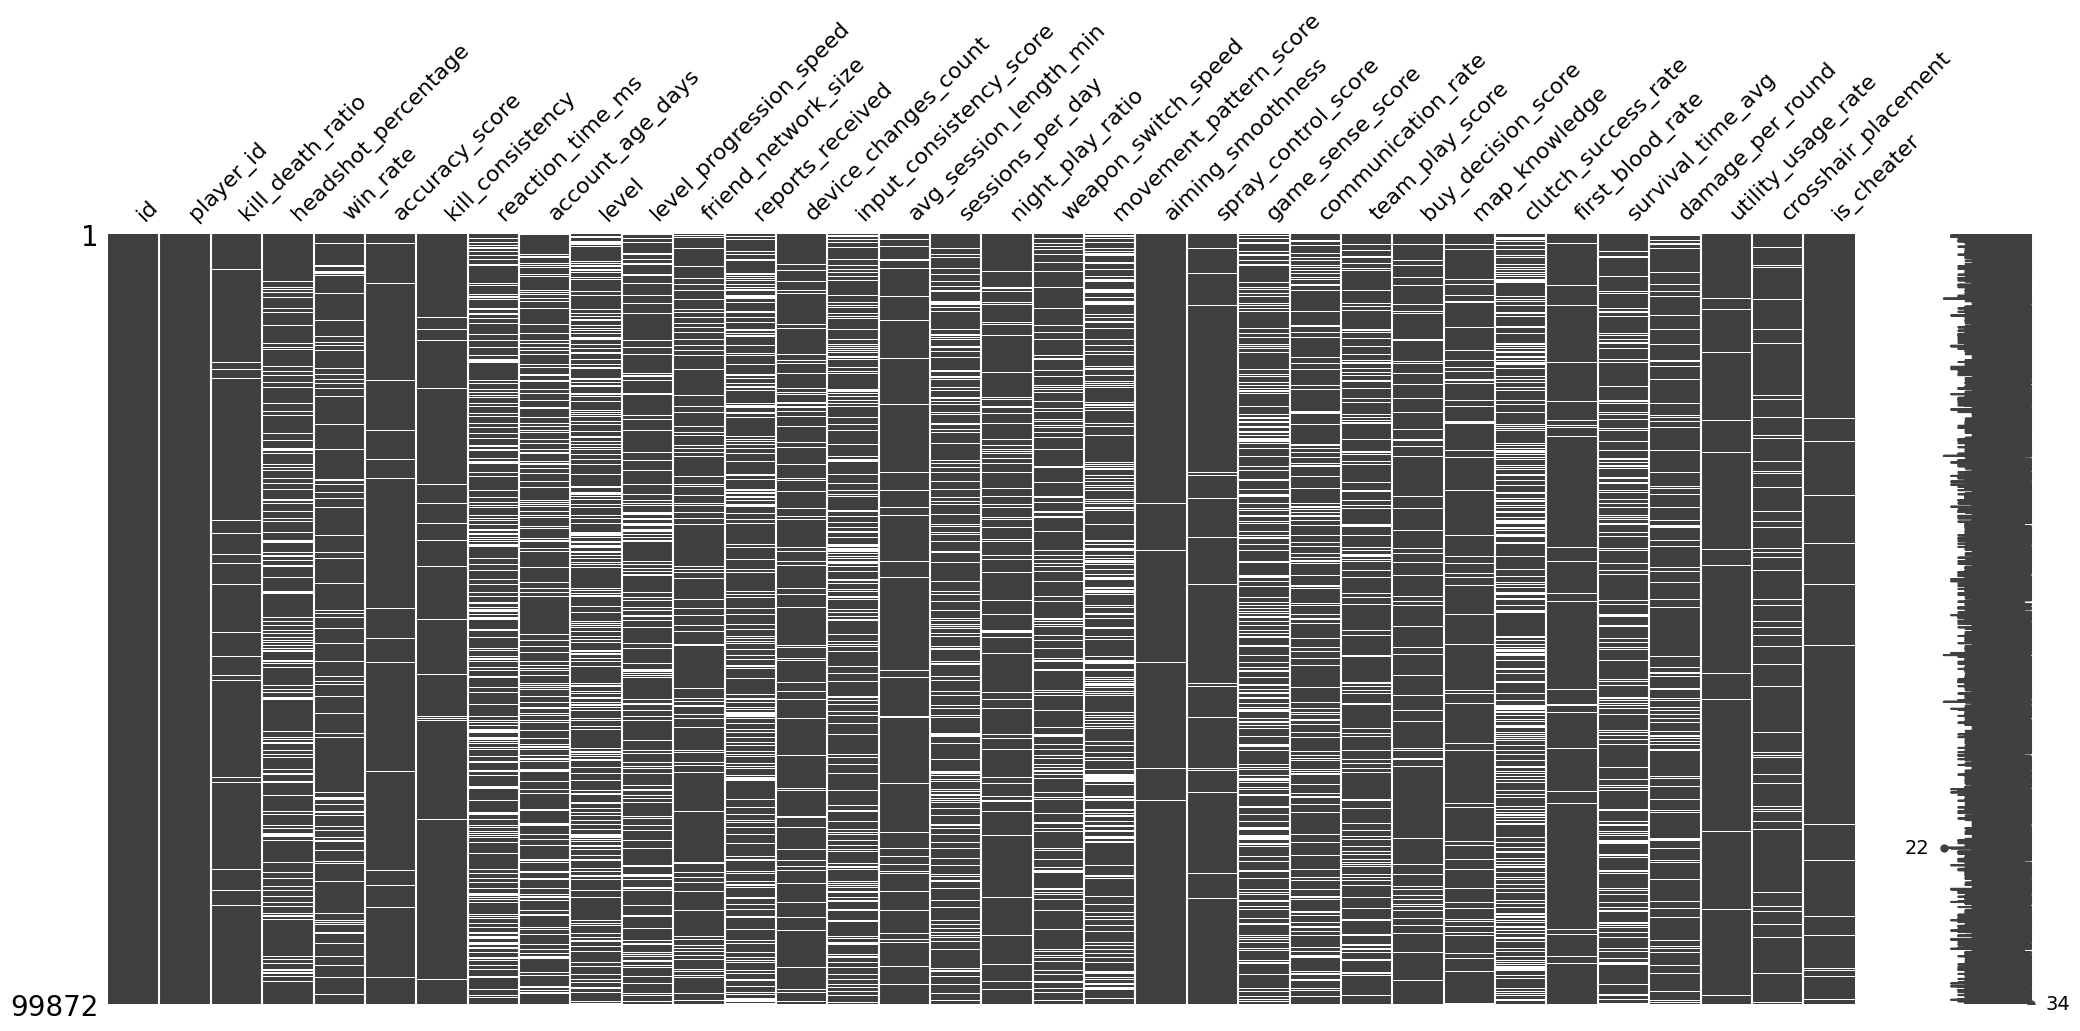

In [119]:
msno.matrix(df)

#### Step 1.2.1: Drop some rows and columns

We need to drop the row with missing `is_cheater` value, since that part is essential for our model.

In [120]:
df.dropna(subset =  ['is_cheater'], how = 'any', inplace = True)

df['is_cheater'].isnull().sum()

np.int64(0)

In [121]:
df.drop(['id', 'player_id'], axis = 1, inplace = True)

df.head()

,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,...,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement,is_cheater
0,4.556072,15.494589,NaN,36.953785,0.737653,NaN,1204.586641,73.364603,0.033039,122.0,...,0.653589,0.860407,0.487273,0.534021,0.321734,NaN,91.517681,0.736361,0.928522,0.0
1,6.177695,51.476210,86.670187,59.946064,NaN,93.748524,3.405453,84.104334,12.211503,0.0,...,NaN,0.410925,0.690833,0.151872,0.462196,84.599562,119.212421,0.525739,0.946558,0.0
2,6.584511,51.692578,32.827778,46.545739,0.811803,120.895839,551.221686,43.803175,0.076185,205.0,...,0.639732,0.619968,0.511507,0.311445,0.270611,83.793333,58.200726,0.739374,0.897872,0.0
3,5.237014,44.181842,62.740475,30.260066,0.345491,248.056545,114.034430,NaN,NaN,75.0,...,0.766887,0.612241,0.477374,NaN,0.402723,97.518653,121.315491,0.531533,0.860302,1.0
4,2.453744,44.361101,68.296046,27.470153,0.851962,210.530688,153.210944,83.293728,0.354636,79.0,...,0.691935,0.653540,0.698389,NaN,0.197220,50.405967,79.110571,0.771739,0.853758,1.0


#### Step 1.2.2: Replace missing value

We will handling the missing data with IterativeImputer from Scikit-learn

In [ ]:
df_mice = df.copy(deep=True)

mice_imputer = IterativeImputer()

df_mice = mice_imputer.fit_transform(df_mice)

reconstruct the dataFrame

In [131]:
df_filled = pd.DataFrame(df_mice, columns = df.columns)

df_filled.head()

,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,...,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement,is_cheater
0,4.556072,15.494589,73.046860,36.953785,0.737653,165.822094,1204.586641,73.364603,0.033039,122.0,...,0.653589,0.860407,0.487273,0.534021,0.321734,65.852280,91.517681,0.736361,0.928522,0.0
1,6.177695,51.476210,86.670187,59.946064,0.621328,93.748524,3.405453,84.104334,12.211503,0.0,...,0.650365,0.410925,0.690833,0.151872,0.462196,84.599562,119.212421,0.525739,0.946558,0.0
2,6.584511,51.692578,32.827778,46.545739,0.811803,120.895839,551.221686,43.803175,0.076185,205.0,...,0.639732,0.619968,0.511507,0.311445,0.270611,83.793333,58.200726,0.739374,0.897872,0.0
3,5.237014,44.181842,62.740475,30.260066,0.345491,248.056545,114.034430,60.342289,0.816644,75.0,...,0.766887,0.612241,0.477374,0.340620,0.402723,97.518653,121.315491,0.531533,0.860302,1.0
4,2.453744,44.361101,68.296046,27.470153,0.851962,210.530688,153.210944,83.293728,0.354636,79.0,...,0.691935,0.653540,0.698389,0.339042,0.197220,50.405967,79.110571,0.771739,0.853758,1.0


In [150]:
df_filled.isnull().sum()

kill_death_ratio           0
headshot_percentage        0
win_rate                   0
accuracy_score             0
kill_consistency           0
reaction_time_ms           0
account_age_days           0
level                      0
level_progression_speed    0
friend_network_size        0
reports_received           0
device_changes_count       0
input_consistency_score    0
avg_session_length_min     0
sessions_per_day           0
night_play_ratio           0
weapon_switch_speed        0
movement_pattern_score     0
aiming_smoothness          0
spray_control_score        0
game_sense_score           0
communication_rate         0
team_play_score            0
buy_decision_score         0
map_knowledge              0
clutch_success_rate        0
first_blood_rate           0
survival_time_avg          0
damage_per_round           0
utility_usage_rate         0
crosshair_placement        0
is_cheater                 0
dtype: int64

### Step 2: Training Preparation

#### Step 2.1: Train/Test split

In [151]:
X = df_filled.drop(['is_cheater'], axis = 1)

X.head()

,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,...,communication_rate,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement
0,4.556072,15.494589,73.046860,36.953785,0.737653,165.822094,1204.586641,73.364603,0.033039,122.0,...,0.620589,0.653589,0.860407,0.487273,0.534021,0.321734,65.852280,91.517681,0.736361,0.928522
1,6.177695,51.476210,86.670187,59.946064,0.621328,93.748524,3.405453,84.104334,12.211503,0.0,...,0.851946,0.650365,0.410925,0.690833,0.151872,0.462196,84.599562,119.212421,0.525739,0.946558
2,6.584511,51.692578,32.827778,46.545739,0.811803,120.895839,551.221686,43.803175,0.076185,205.0,...,0.636306,0.639732,0.619968,0.511507,0.311445,0.270611,83.793333,58.200726,0.739374,0.897872
3,5.237014,44.181842,62.740475,30.260066,0.345491,248.056545,114.034430,60.342289,0.816644,75.0,...,0.799637,0.766887,0.612241,0.477374,0.340620,0.402723,97.518653,121.315491,0.531533,0.860302
4,2.453744,44.361101,68.296046,27.470153,0.851962,210.530688,153.210944,83.293728,0.354636,79.0,...,0.242936,0.691935,0.653540,0.698389,0.339042,0.197220,50.405967,79.110571,0.771739,0.853758


In [153]:
y = df_filled['is_cheater']

y.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: is_cheater, dtype: float64

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)

# Checking the new size
X_train.shape

(78198, 31)

#### Step 2.2: Loss Function Preparation

In [171]:
from sklearn.metrics import precision_score, recall_score
def f2_score(y_test, y_pred):
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    
    f2 = 5 * (precision * recall) / (4*precision + recall)
    return f2

### Step 3: Train the model

In [167]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [168]:
y_pred = forest.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.], shape=(19550,))

## Step 4: Evaluation

In [172]:
f2 = f2_score(y_pred, y_test)
print(f2)

0.8216500913014835
